# Final Project Submission

## Business Understanding

## Data Understanding

#### Importing Packages and Reading in Data

In [2]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import statsmodels.stats.stattools as stattools
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import numpy as np
import warnings
from math import e

warnings.filterwarnings('ignore')
style.use('dark_background')
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

In [3]:
# importing King County House Sales dataset
df = pd.read_csv('data/kc_house_data.csv')

#### Looking at sample # / number of predictors / basic statistics

In [4]:
print('''This data set has {} rows and {} columns.'''.format(df.shape[0],df.shape[1]))

This data set has 21597 rows and 21 columns.


In [5]:
# looks like price is the dependent variable with 20 potential predictors
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# taking a look at basic stats of descriptors. price looks skewed based on differences in mean and median
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Looking at distribution of continuous variables
- not an assumption

Text(0.5, 1.0, 'Histogram of Price (MM)')

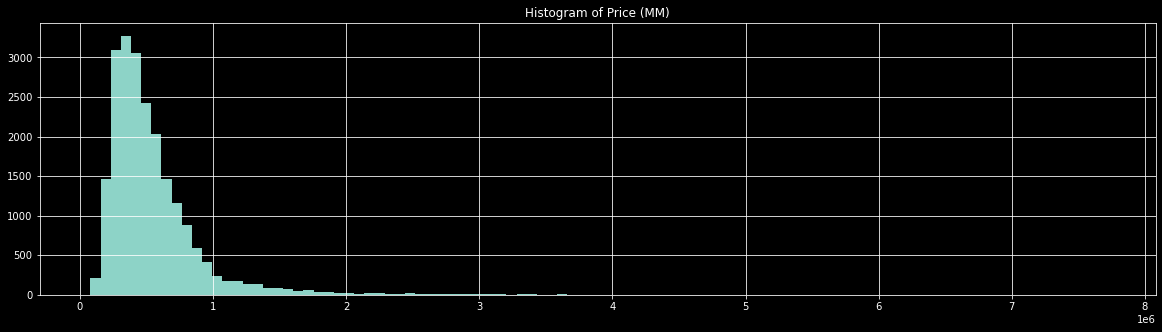

In [19]:
# plt.figure(figsize = (25,300))
df.hist('price',bins = 100, figsize = (20,5))
plt.title('Histogram of Price (MM)')

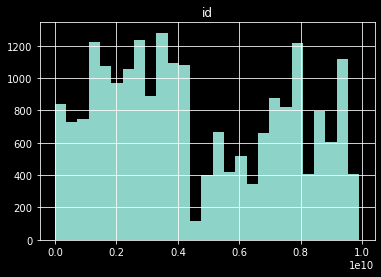

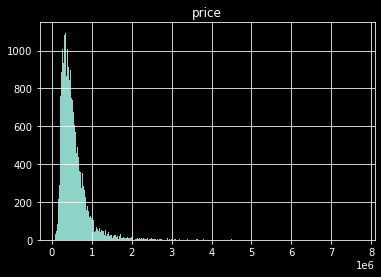

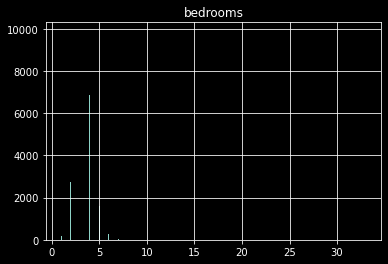

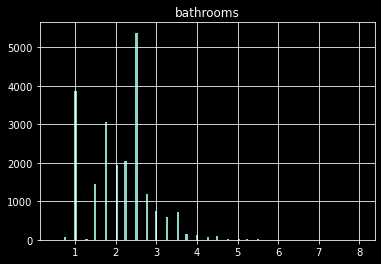

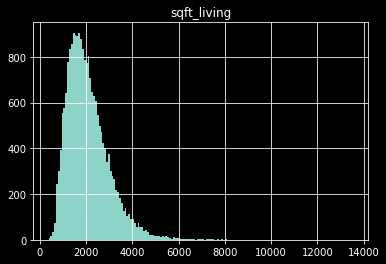

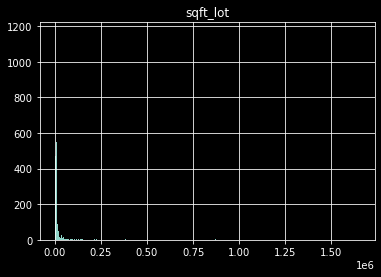

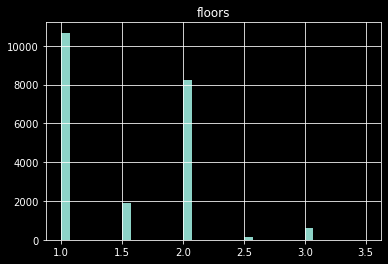

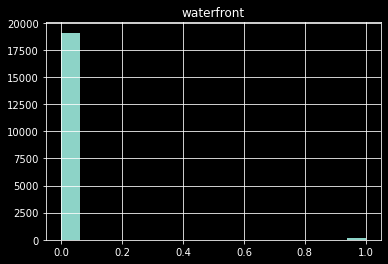

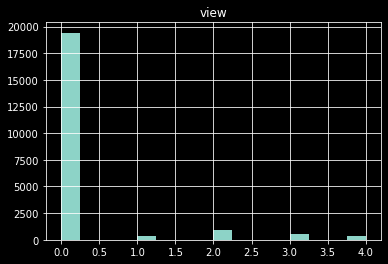

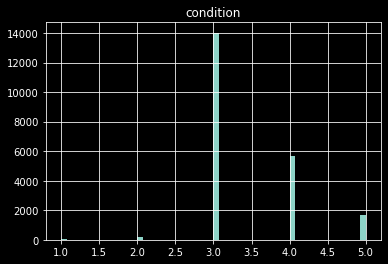

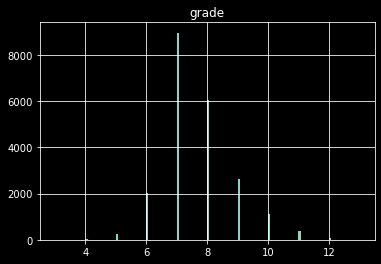

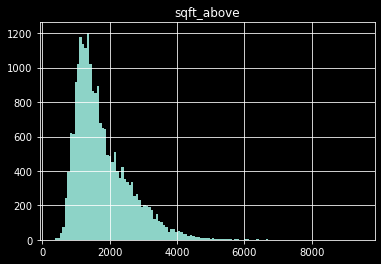

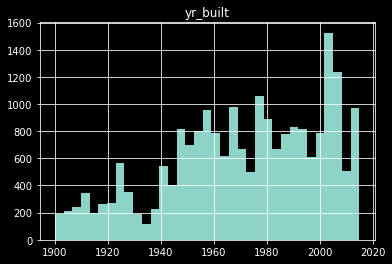

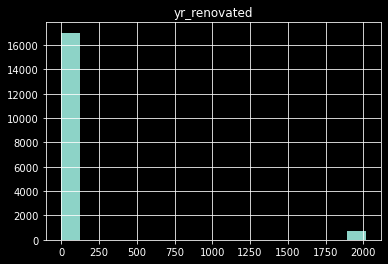

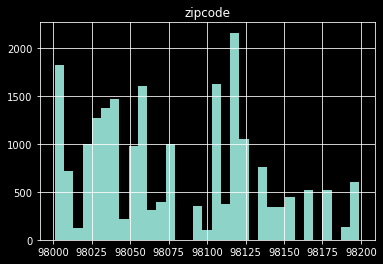

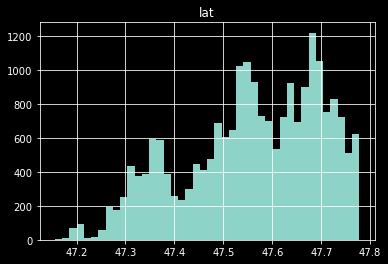

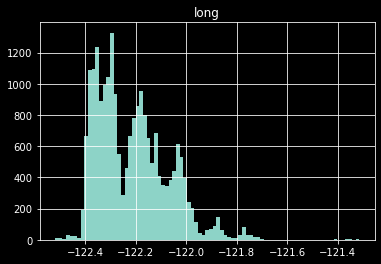

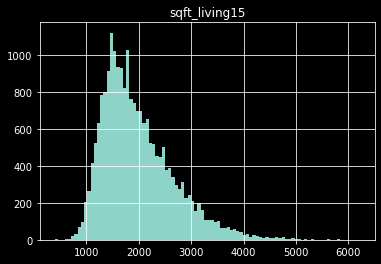

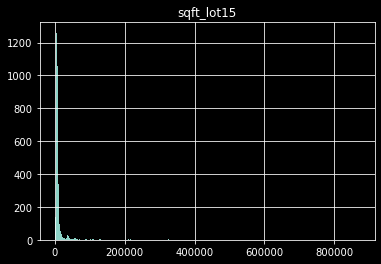

In [6]:
# Checking Normality of Variables (not an assumption, but just for reference)
# id, floors, waterfront, view, yr_built, yr_renovated, zipcode, lat, long do not follow a normal dist. others seem skewed. 
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        df.hist(col,bins='auto')

## Data Preparation

#### Handling N/A's

In [7]:
df.isna().sum()
# looks like waterfront, view, and yr_renovated columns need to be addressed

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
## checking waterfront column
print('''Unique values are {} removing waterfront N/A's would remove {} of the overall dataset. We can drop this column from the dataset since we 
are looking at affordable homes, and a waterfront property is not a priority'''
      .format(df.waterfront.unique(), '{:0.1%}'.format(df.waterfront.isna().sum() / len(df))))
## dropping waterfront columns
df.drop('waterfront',axis=1,inplace=True)

Unique values are [nan  0.  1.] removing waterfront N/A's would remove 11.0% of the overall dataset. We can drop this column from the dataset since we 
are looking at affordable homes, and a waterfront property is not a priority


In [9]:
## dropping views column
df.drop('view',axis=1,inplace=True)

In [10]:
## checking yr_renovated column
print('''removing view N/A's would remove {} of the overall dataset. Let's assume N/A means no renovations.'''
      .format('{:0.1%}'.format(df.yr_renovated.isna().sum() / len(df))))
## filling N/A values with 0
df.yr_renovated.fillna(0,inplace=True)

removing view N/A's would remove 17.8% of the overall dataset. Let's assume N/A means no renovations.


#### Converting data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [12]:
# sqft_basement is object type, should be numeric.
df.sqft_basement.unique()[:6]

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0'], dtype=object)

In [13]:
## some rows have a "?" value. need to remove
df = df.loc[~(df.sqft_basement == '?')]

In [14]:
# changing ID and Zip columns to str type
for col in ['id', 'zipcode']:
    df[col] = df[col].astype(str)

In [15]:
# changing columns to int type
for col in ['id', 'price', 'bedrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']:
    df[col] = df[col].astype(float).astype(int)

In [16]:
df.info()
# all dtypes are as they should be now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  int64  
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  sqft_basement  21143 non-null  int64  
 12  yr_built       21143 non-null  int64  
 13  yr_renovated   21143 non-null  int64  
 14  zipcode        21143 non-null  object 
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

#### Checking for and removing Multicollinearity

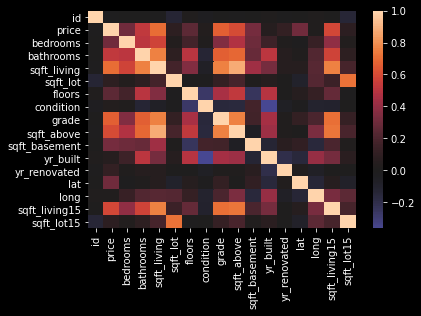

In [17]:
# overall view of correlation. Looks like we have some values > 0.7
sns.heatmap(df.corr(), center=0);

In [18]:
# Viewing Correlation Between Each Variable ad Checking which variables have a correlation > 0.70 as this could suggest multicollinearity
df_corr = df.corr().abs().stack().reset_index()
df_corr['preds'] = df_corr['level_0']+' & '+df_corr['level_1']
df_corr = df_corr.drop(['level_0','level_1'],axis = 1).rename(columns={0:'corr'}).sort_values(by='corr',ascending = False)
df_corr.loc[(df_corr['corr'] > 0.7) & (df_corr['corr'] != 1)]

,corr,preds
157,0.876678,sqft_above & sqft_living
77,0.876678,sqft_living & sqft_above
140,0.763101,grade & sqft_living
76,0.763101,sqft_living & grade
259,0.756389,sqft_living15 & sqft_living
83,0.756389,sqft_living & sqft_living15
161,0.756382,sqft_above & grade
145,0.756382,grade & sqft_above
71,0.755278,sqft_living & bathrooms
55,0.755278,bathrooms & sqft_living


In [19]:
# KCHA isn't really interested in renovating details, and since this has high multicollinearity let's remove them.
df.drop(['sqft_lot15','sqft_living15'],axis=1,inplace=True)

In [20]:
## Looks like sqft_living and sqft_above is also highly correlated with other features. Lets drop them.
df.drop(['sqft_above','sqft_living'],axis=1,inplace=True)

#### Splitting data to Continuous and Categorical variables

In [21]:
#SPLITTING INTO CONTINOUS AND DISCRETE VARIABLES to turn categorical into dummy variables.
cont = df[['price','id', 'bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']]
cat = df[['zipcode']]

#### Checking Linearity of Features

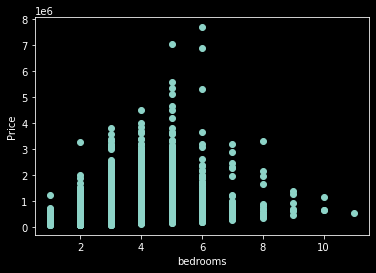

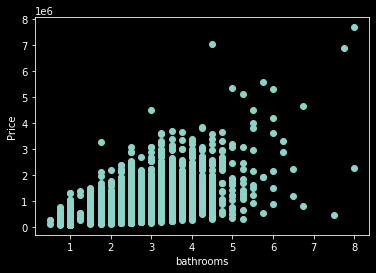

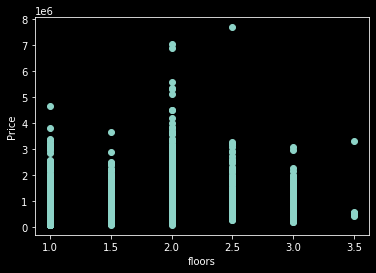

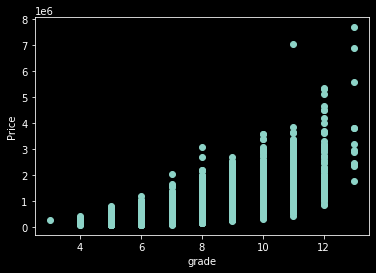


----------- NOTES: ------------
Makes sense that ID does not have a relationship with price -- drop ID
looks like bedrooms has an outlier -- remove bedrooms > 30 from analysis. 
sqft_lot does not have a linear relationship with price -- drop sqft_lot
sqft_basement seems off, drop and transform to categorical variable (has basement, does not have basement)
yr_built is does not have linear relationship with price, drop yr_built
yr_renovated does not have linear relationship with price, drop and transform to categorical variable (renovated, not renovated)
we can use grade to determine quality rather than condition since it has a better linear relationship with price, and drop condition column
lat & long do not have a linear relationship, drop



In [85]:
## Checking Linearity of Features to Dependent variable
for col in cont.drop('price',axis=1).columns:
    plt.scatter(cont[col],cont['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()
    
print('''
----------- NOTES: ------------
Makes sense that ID does not have a relationship with price -- drop ID
looks like bedrooms has an outlier -- remove bedrooms > 30 from analysis. 
sqft_lot does not have a linear relationship with price -- drop sqft_lot
sqft_basement seems off, drop and transform to categorical variable (has basement, does not have basement)
yr_built is does not have linear relationship with price, drop yr_built
yr_renovated does not have linear relationship with price, drop and transform to categorical variable (renovated, not renovated)
we can use grade to determine quality rather than condition since it has a better linear relationship with price, and drop condition column
lat & long do not have a linear relationship, drop
''')

In [23]:
# removing outlier with 33 bedrooms
cont = cont.loc[~(cont.bedrooms >= 30)]

In [24]:
## creating function to turn values > 0 to 1, and values = 0 to 0.
def make_binary(row):
    if row > 0:
        return 1
    if row == 0:
        return 0
    

## modifying sqft_basement and yr_renovated to be binary variables
## adding new dummy vars into x_cat
cat['has_basement'] = cont['sqft_basement'].apply(make_binary)
cat['renovated'] = cont['yr_renovated'].apply(make_binary)
cat = cat.loc[cat.renovated.isin([0,1])]

In [25]:
## dropping vars that do not have a linear relationship
cont.drop(['id','sqft_lot','sqft_basement','yr_renovated','yr_built','lat','long','condition'],axis=1,inplace=True)

#### Encoding Categorical Variables

In [26]:
# checking out how many unique values are in each cat value
for col in cat.columns:
    print(col, len(cat[col].unique()))

zipcode 70
has_basement 2
renovated 2


In [27]:
cat_dummies_list = []
for idx, col in enumerate(cat.columns):
    cat_dummies_list.append(pd.get_dummies(cat[col], prefix=col, drop_first=True)) # drop to avoid dummy trap, 
    
cat_dummies = pd.concat(cat_dummies_list, axis=1)

#### Looking into whether we should normalize data

In [28]:
cont.drop('price',axis=1).describe()

,bedrooms,bathrooms,floors,grade
count,21142.000000,21142.000000,21142.000000,21142.000000
mean,3.371157,2.116096,1.493615,7.658310
std,0.902213,0.768545,0.539252,1.174272
min,1.000000,0.500000,1.000000,3.000000
25%,3.000000,1.750000,1.000000,7.000000
50%,3.000000,2.250000,1.500000,7.000000
75%,4.000000,2.500000,2.000000,8.000000
max,11.000000,8.000000,3.500000,13.000000


In [29]:
for col in cont.drop('price',axis=1).columns:
    print('range of values for '+col+": ",max(cont[col]) - min(cont[col]))
print("\nconsidering the range for all these features are not too different, we shouldn't need to normalize the data")

range of values for bedrooms:  10
range of values for bathrooms:  7.5
range of values for floors:  2.5
range of values for grade:  10

considering the range for all these features are not too different, we shouldn't need to normalize the data


# Modeling

#### MODEL 1

In [30]:
# Creating inputs for model 1, with Continuous variables only
X = cont.drop('price',axis=1)
y = cont['price']

In [31]:
# creating function to run OLS regression
def run_model(X,y):
    predictors_int = sm.add_constant(X)
    return sm.OLS(y,predictors_int).fit()

In [32]:
# running model
model_1 = run_model(X,y)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4630.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:29:31   Log-Likelihood:            -2.9430e+05
No. Observations:               21142   AIC:                         5.886e+05
Df Residuals:                   21137   BIC:                         5.887e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.874e+05   1.37e+04    -72.000      0.000   -1.01e+06   -9.61e+05
bedrooms    1.217e+04   2428.974      5.011      0.000    7410.050    1.69e+04
bathrooms   8.057e+04   3728.096     21.611      0.000    7.33e+04    8.79e+04
floors     -7.271e+04   4071.543    -17.859      0.000   -8.07e+04   -6.47e+04
grade       1.861e+05   2153.468     86.405      0.000    1.82e+05     1.9e+05
==============================================================================
Omnibus:                    18852.047   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1731976.726
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      46.648   Cond. No.                         67.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

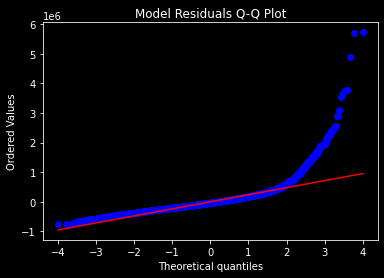

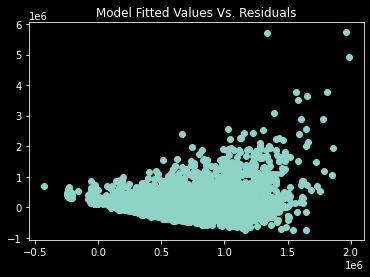

residuals for this model do not follow that of a normal distribution, and error terms for this model are heteroscedastic. We may want to log transform variables


In [33]:
# Checking for normality of residuals and homoscedasticity

# running QQ Plot
stats.probplot(model_1.resid, dist="norm", plot= plt)
plt.title("Model Residuals Q-Q Plot")
plt.show()

# running fitted values vs. residuals
plt.scatter(model_1.fittedvalues,model_1.resid)
plt.title("Model Fitted Values Vs. Residuals")
plt.show()

print("residuals for this model do not follow that of a normal distribution, and error terms for this model are heteroscedastic. We may want to log transform variables")

#### Model 2 - Transforming Y & dropping Floors

In [34]:

# Log transforming Y variable
y_log = np.log(y)

# Floors having a negative coefficient doesn't seem to make sense. Let's drop
X = X.drop('floors', axis = 1)

# running model 2 with log transform
model_2 = run_model(X,y_log)
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     7355.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:29:31   Log-Likelihood:                -8886.3
No. Observations:               21142   AIC:                         1.778e+04
Df Residuals:                   21138   BIC:                         1.781e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6759      0.019    570.480      0.000      10.639      10.713
bedrooms       0.0412      0.003     12.455      0.000       0.035       0.048
bathrooms      0.0767      0.005     15.843      0.000       0.067       0.086
grade          0.2705      0.003     93.414      0.000       0.265       0.276
==============================================================================
Omnibus:                      134.197   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.612
Skew:                           0.196   Prob(JB):                     2.16e-30
Kurtosis:                       3.043   Cond. No.                         66.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Model 2 has an improved adj. R-squared. Let's check the residuals again.

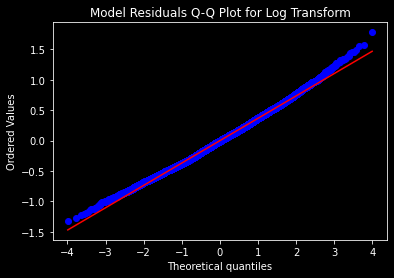

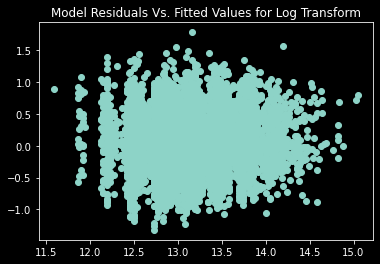

In [36]:
stats.probplot(model_2.resid, dist="norm", plot= plt)
plt.title("Model Residuals Q-Q Plot for Log Transform")
plt.show()
plt.scatter(model_2.fittedvalues,model_2.resid)
plt.title("Model Residuals Vs. Fitted Values for Log Transform")
plt.show()

In [37]:
# These plots look much better, errors are homoscedasctic and follow a normal distribution

#### Model 3 - Adding Categorical Variables

In [38]:
# Adding in zipcode dummy variables to our model
X = pd.concat((X, cat_dummies), axis=1)
model_3 = run_model(X , y_log)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1156.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:29:32   Log-Likelihood:                 696.23
No. Observations:               21142   AIC:                            -1242.
Df Residuals:                   21067   BIC:                            -645.5
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.6811      0.018    598.803      0.000      10.646      10.716
bedrooms             0.0536      0.002     24.734      0.000       0.049       0.058
bathrooms            0.0887      0.003     27.743      0.000       0.082       0.095
grade                0.1970      0.002     98.302      0.000       0.193       0.201
zipcode_98002       -0.0147      0.021     -0.705      0.481      -0.056       0.026
zipcode_98003       -0.0077      0.019     -0.408      0.683      -0.045       0.029
zipcode_98004        1.1491      0.018     62.664      0.000       1.113       1.185
zipcode_98005        0.7563      0.022     34.175      0.000       0.713       0.800
zipcode_98006        0.6818      0.017     41.139      0.000       0.649       0.714
zipcode_98007        0.6187      0.024     26.300      0.000       0.573       0.665
zipcode_98008        0.6744      0.019     35.822      0.000       0.637       0.711
zipcode_98010        0.3357      0.027     12.529      0.000       0.283       0.388
zipcode_98011        0.4441      0.021     21.098      0.000       0.403       0.485
zipcode_98014        0.4136      0.025     16.777      0.000       0.365       0.462
zipcode_98019        0.3589      0.021     16.933      0.000       0.317       0.400
zipcode_98022        0.1555      0.020      7.797      0.000       0.116       0.195
zipcode_98023       -0.0572      0.016     -3.486      0.000      -0.089      -0.025
zipcode_98024        0.5497      0.029     18.824      0.000       0.492       0.607
zipcode_98027        0.5194      0.017     30.156      0.000       0.486       0.553
zipcode_98028        0.4177      0.019     22.149      0.000       0.381       0.455
zipcode_98029        0.5238      0.018     28.513      0.000       0.488       0.560
zipcode_98030        0.0306      0.019      1.580      0.114      -0.007       0.069
zipcode_98031        0.0553      0.019      2.901      0.004       0.018       0.093
zipcode_98032       -0.0461      0.025     -1.876      0.061      -0.094       0.002
zipcode_98033        0.7885      0.017     46.545      0.000       0.755       0.822
zipcode_98034        0.5180      0.016     32.187      0.000       0.486       0.550
zipcode_98038        0.1796      0.016     11.295      0.000       0.148       0.211
zipcode_98039        1.3561      0.036     37.709      0.000       1.286       1.427
zipcode_98040        0.9566      0.019     50.217      0.000       0.919       0.994
zipcode_98042        0.0711      0.016      4.434      0.000       0.040       0.103
zipcode_98045        0.3552      0.020     17.492      0.000       0.315       0.395
zipcode_98052        0.6166      0.016     38.552      0.000       0.585       0.648
zipcode_98053        0.6487      0.017     37.570      0.000       0.615       0.682
zipcode_98055        0.

In [39]:
# adjusted R Squared value increases by a lot. some Zip's have p-Values > 0.05, we could try removing

In [40]:
zips_to_drop = ['zipcode_98002','zipcode_98003','zipcode_98030','zipcode_98032']

#### Model 4 - Removing Features with P-values > 0.05

In [41]:
## Dropping zips with high P-value's
X = X.drop(zips_to_drop,axis=1)
model_4 = run_model(X, y_log)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1221.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:29:32   Log-Likelihood:                 691.24
No. Observations:               21142   AIC:                            -1240.
Df Residuals:                   21071   BIC:                            -675.4
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.6782      0.014    742.349      0.000      10.650      10.706
bedrooms             0.0536      0.002     24.714      0.000       0.049       0.058
bathrooms            0.0891      0.003     27.888      0.000       0.083       0.095
grade                0.1969      0.002     98.507      0.000       0.193       0.201
zipcode_98004        1.1515      0.015     76.514      0.000       1.122       1.181
zipcode_98005        0.7587      0.019     38.928      0.000       0.721       0.797
zipcode_98006        0.6843      0.013     53.291      0.000       0.659       0.709
zipcode_98007        0.6212      0.021     29.492      0.000       0.580       0.662
zipcode_98008        0.6770      0.016     43.297      0.000       0.646       0.708
zipcode_98010        0.3382      0.025     13.713      0.000       0.290       0.387
zipcode_98011        0.4466      0.018     24.460      0.000       0.411       0.482
zipcode_98014        0.4160      0.022     18.641      0.000       0.372       0.460
zipcode_98019        0.3613      0.018     19.606      0.000       0.325       0.397
zipcode_98022        0.1580      0.017      9.312      0.000       0.125       0.191
zipcode_98023       -0.0547      0.013     -4.330      0.000      -0.079      -0.030
zipcode_98024        0.5521      0.027     20.254      0.000       0.499       0.606
zipcode_98027        0.5218      0.014     38.177      0.000       0.495       0.549
zipcode_98028        0.4202      0.016     26.803      0.000       0.390       0.451
zipcode_98029        0.5261      0.015     34.838      0.000       0.497       0.556
zipcode_98031        0.0578      0.016      3.629      0.000       0.027       0.089
zipcode_98033        0.7909      0.013     59.417      0.000       0.765       0.817
zipcode_98034        0.5206      0.012     42.631      0.000       0.497       0.545
zipcode_98038        0.1820      0.012     15.200      0.000       0.158       0.205
zipcode_98039        1.3584      0.034     39.474      0.000       1.291       1.426
zipcode_98040        0.9590      0.016     60.276      0.000       0.928       0.990
zipcode_98042        0.0736      0.012      6.055      0.000       0.050       0.097
zipcode_98045        0.3576      0.017     20.557      0.000       0.324       0.392
zipcode_98052        0.6190      0.012     51.224      0.000       0.595       0.643
zipcode_98053        0.6510      0.014     47.396      0.000       0.624       0.678
zipcode_98055        0.1291      0.016      8.057      0.000       0.098       0.161
zipcode_98056        0.3477      0.014     25.687      0.000       0.321       0.374
zipcode_98058        0.1575      0.013     12.053      0.000       0.132       0.183
zipcode_98059        0.3717      0.013     28.727      0.000       0.346       0.397
zipcode_98065        0.

In [42]:
# Although the adj. R value does not increase after removal, the F-statistic increases and associated P-value decreases further. This model is best.

# MODEL EVALUATION

#### Train - Test Split to assess model 4's ability to predict

In [43]:
# Performing a train-test-split to assess performance, and whether the model is over or underfitting the data.
# randomly split the data, 67% train 33% test. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_log)

In [44]:
# apply regression to training X and y data, use to predict X train and X test. 
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [45]:
#looking at Mean Squared Error of train and test
# from sklearn.metrics import root_mean_squared_error

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Root Mean Squarred Error:', '{:,.3f}'.format(mse_train))
print('Test Root Mean Squarred Error:', '{:,.3f}'.format(mse_test))
print("\nDifference between train and test:",'{:.1%}'.format(mse_test / mse_train - 1))

Train Root Mean Squarred Error: 0.055
Test Root Mean Squarred Error: 0.054

Difference between train and test: -2.4%


In [46]:
## difference can change depending on the randomly chosen sample, so lets do a cross validation with 10 folds

#### Cross Validation

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

avg_mse = np.mean(cross_val_score(linreg, X, y_log, cv=20, scoring=mse))

print('With an average MSE of','{:.3f}'.format(avg_mse), 'when performing cross validation with 20 folds on our test data, we can be more confident in our model\'s ability to predict new data')

With an average MSE of 0.056 when performing cross validation with 20 folds on our test data, we can be more confident in our model's ability to predict new data


#### Final Evaluation

In [48]:
# creating dictionary of coefficient names and corresponding values for analysis
coefs= dict(model_4.params)

In [70]:
# creating function to report on changes for each feature in our model
def coef_summary():
    for key, value in coefs.items():
        if key == 'const':
            print('A home in zipcode 98001, with a value of 0 for all other features, would have a sale price of','${:,.0f}'.format(e**coefs['const']))
        else:
            if 'zipcode' in key:
                if value > 0:
                    print('Purchasing a home in',key,'would increase the house price by',('{:,.1%}'.format((e**value - 1))))
                if value < 0:
                    print('Purchasing a home in',key,'would decrease the house price by',('{:,.1%}'.format(abs(e**value - 1))))
            else:
                if value > 0:
                    print('A one unit increase in',key,'would increase the house price by',('{:,.1%}'.format((e**value - 1))))
                if value < 0:
                    print('A one unit increase',key,'would decrease the house price by',('{:,.1%}'.format(abs(e**value - 1))))

In [71]:
print('''Final Evaluation:\n\nModel 4 is our strongest model for multiple reasons. It has an adj. R squared value of 0.802, suggesting ~80% of variance in the data can
be explained by our model's features. This result has the highest F-Statistic, and an associated lowest P-value of < 0.001, meaning we reject the null hypothesis that an
intercept-only model would be a better predictor. All features also have an associated P-value of < 0.05, meaning there is less than a 5% chance that these variables have
no effect on house price. Lastly, since this model is built for preliminary insights only and is mainly focused on changes in price due to location, we do not have too 
many specific features that require input, such as exact square footage of the home / lot / basement. Below states the value of a home at it's base (with no features),
as well as changes in sale price value for each additional unit of a feature, assuming all other variables are held constant. The changes are reported as a percentage
change, as the sale variable is log transformed.\n''') 
coef_summary()

Final Evaluation:

Model 4 is our strongest model for multiple reasons. It has an adj. R squared value of 0.802, suggesting ~80% of variance in the data can
be explained by our model's features. This result has the highest F-Statistic, and an associated lowest P-value of < 0.001, meaning we reject the null hypothesis that an
intercept-only model would be a better predictor. All features also have an associated P-value of < 0.05, meaning there is less than a 5% chance that these variables have
no effect on house price. Lastly, since this model is built for preliminary insights only and is mainly focused on changes in price due to location, we do not have too 
many specific features that require input, such as exact square footage of the home / lot / basement. Below states the value of a home at it's base (with no features),
as well as changes in sale price value for each additional unit of a feature, assuming all other variables are held constant. The changes are reported as a percentag

## BEGINNING DEPLOYMENT

In [72]:
# Writing a function that generates the input to predict using the model created. We will then apply this function to each family

X = X.reindex(sorted(X.columns, reverse = True), axis=1)
def hhold_details(zipcode,renovated,has_basement,grade,bedrooms,bathrooms):
    pred_list = [0] * len([x for x in X.columns if x[:3] == 'zip'])
    
    if zipcode == 98001 or 'zipcode_'+str(zipcode) in zips_to_drop:
        pass
    else:
        zipcode = 'zipcode_'+str(zipcode)
        zip_idx = X.columns.get_loc(zipcode)
        pred_list[zip_idx] = 1

    pred_list.append(renovated)
    pred_list.append(has_basement)
    pred_list.append(grade)
    pred_list.append(bedrooms)
    pred_list.append(bathrooms)
    return pred_list

In [74]:
# Fitting Model to final X and y. 
regr = linear_model.LinearRegression()
regr.fit(X, y_log)

LinearRegression()

In [75]:
# Using function to generate predictor list for each family
fam1 = hhold_details(bedrooms = 3, bathrooms = 2, grade = 6, zipcode = 98011, has_basement = 1, renovated = 0)
fam2 = hhold_details(bedrooms = 2, bathrooms = 1, grade = 6, zipcode = 98032, has_basement = 0, renovated = 0)
fam3 = hhold_details(bedrooms = 1, bathrooms = 1, grade = 8, zipcode = 98045, has_basement = 0, renovated = 0)
fam4 = hhold_details(bedrooms = 4, bathrooms = 3, grade = 6, zipcode = 98065, has_basement = 1, renovated = 0)
fam5 = hhold_details(bedrooms = 1, bathrooms = 2, grade = 5, zipcode = 98001, has_basement = 0, renovated = 0)

In [84]:
# Calculating price prediction based on house featurs, as well as the overall budget required, assuming the down payment is 30% of the total house price.
overall_spend = []
for fam in [fam1,fam2,fam3,fam4,fam5]:
    pred_fam = regr.predict([fam])
    overall_spend.append(e**pred_fam[0]*.30)

    print('The predicted cost of a home with these features and in this zipcode would be '+'$ {:,.0f}'.format(e**pred_fam[0])+', requiring a down payment of at least '+'$ {:,.0f}'.format(e**pred_fam[0]*.30))
print('\nTotal Budget Required: At least '+'$ {:,.0f}'.format(sum(overall_spend)))

The predicted cost of a home with these features and in this zipcode would be $ 328,112, requiring a down payment of at least $ 98,433
The predicted cost of a home with these features and in this zipcode would be $ 172,145, requiring a down payment of at least $ 51,644
The predicted cost of a home with these features and in this zipcode would be $ 345,946, requiring a down payment of at least $ 103,784
The predicted cost of a home with these features and in this zipcode would be $ 388,881, requiring a down payment of at least $ 116,664
The predicted cost of a home with these features and in this zipcode would be $ 146,478, requiring a down payment of at least $ 43,944

Total Budget Required: At least $ 414,469
